<a href="https://colab.research.google.com/github/nannthd/bsc_dpdm22/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# import data

In [35]:
wine_data = pd.read_csv('/content/drive/MyDrive/Data Prep and Data Mining BSc65/Project/winemag-data_first150k.csv')
wine_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


# ตรวจสอบ Missing

In [36]:
wine_data.isnull().any()

Unnamed: 0     False
country         True
description    False
designation     True
points         False
price           True
province        True
region_1        True
region_2        True
variety        False
winery         False
dtype: bool

In [37]:
wine_data_clean = wine_data.dropna()

In [38]:
wine_data_clean.isnull().any()

Unnamed: 0     False
country        False
description    False
designation    False
points         False
price          False
province       False
region_1       False
region_2       False
variety        False
winery         False
dtype: bool

# Classification

##DecisionTree

In [39]:
#กำหนด features และ target
X = wine_data_clean[['points', 'price']]
y = wine_data_clean['variety']

#แบ่งข้อมูลออกเป็น training set และ test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

#สร้าง model และ train ด้วย training set
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=3,min_samples_leaf=5,max_depth=4)
dtc.fit(X_train, y_train)

#ทำการ predict ด้วย test set
y_pred = dtc.predict(X_test)

#คำนวณค่า accuracy ของ model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2541725060517263


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

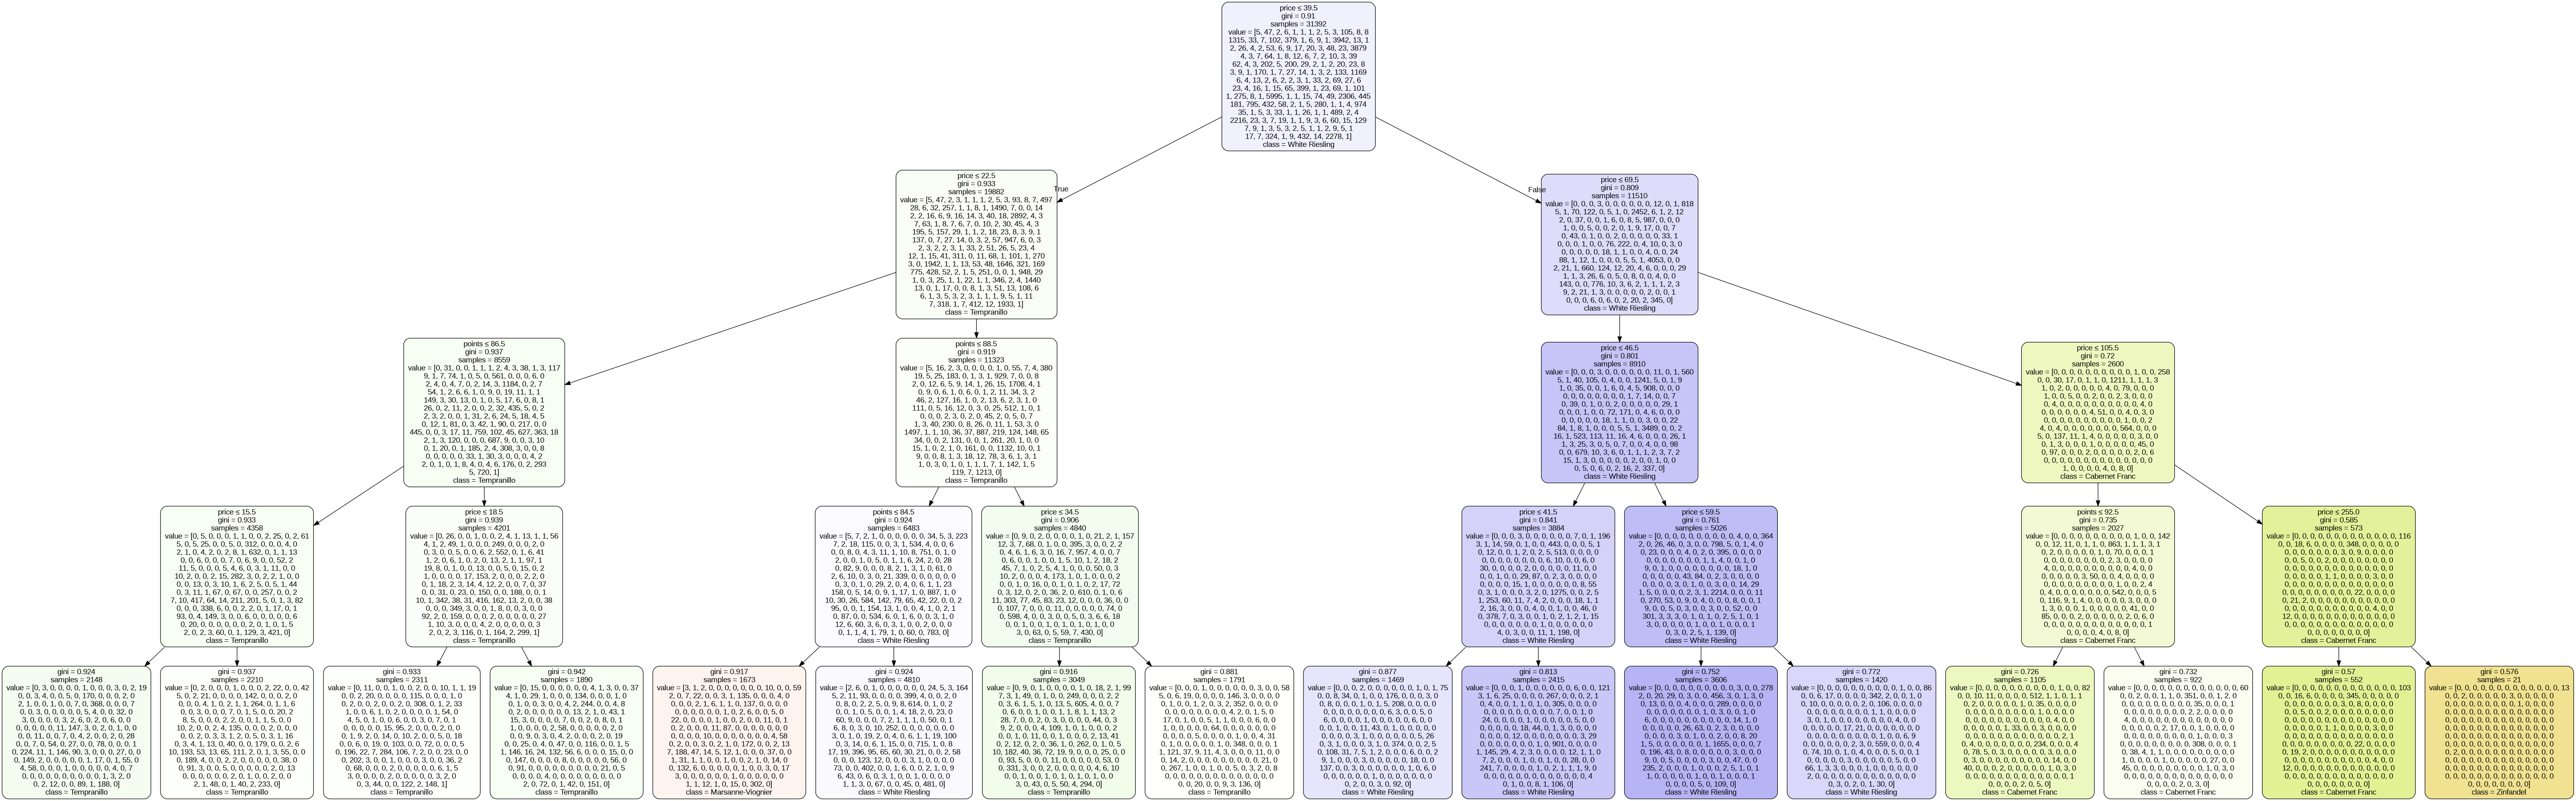

In [41]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

dot_data = export_graphviz(dtc, out_file=None, 
                           feature_names=X.columns,  
                           class_names=y.unique(),  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
Image(graph.pipe(format='png'))

In [ ]:
from sklearn.tree import plot_tree

plot_tree(dtc)

DecisionTree ได้ค่า Accuracy: 0.2541725060517263

##Naive Bays

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [44]:
# เลือกเฉพาะคอลัมน์ "variety" และ "description"
wine_data2 = wine_data_clean[["variety", "description"]]

# แปลงคอลัมน์ "variety" เป็นตัวเลขโดยใช้ LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wine_data2["variety_num"] = le.fit_transform(wine_data2["variety"])

# แบ่งข้อมูลเป็นชุด train และ test โดยสุ่มอัตราส่วน 70:30
train_data, test_data, train_labels, test_labels = train_test_split(
    wine_data2["description"], wine_data2["variety_num"], test_size=0.3, random_state=3)

# แปลงข้อมูลข้อความเป็นเวกเตอร์จำนวนเต็มโดยใช้ CountVectorizer
cv = CountVectorizer()
train_vectors = cv.fit_transform(train_data)
test_vectors = cv.transform(test_data)

# สร้างโมเดล Naive Bayes และฝึกโมเดลด้วยชุด train
nb_model = MultinomialNB()
nb_model.fit(train_vectors, train_labels)

# ใช้โมเดลทำนายค่า test
predicted_labels = nb_model.predict(test_vectors)

# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)

<ipython-input-44-869fc4138a72>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data2["variety_num"] = le.fit_transform(wine_data2["variety"])


Accuracy: 0.632549052917693


Naive Bays ได้ค่า Accuracy: 0.632549052917693

##k-Nearest Neighbor

In [45]:
import pandas as pd
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

# สร้าง LabelEncoder object สำหรับแปลงข้อมูลของคอลัมน์ 'variety' เป็นตัวเลข
le = preprocessing.LabelEncoder()
wine_data_clean['variety'] = le.fit_transform(wine_data_clean['variety'])

# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลขมาใช้ในการ Train Model
X = wine_data_clean[['price', 'points', 'variety']]

# แยกข้อมูล Train และ Test
X_train, X_test, y_train, y_test = train_test_split(X, wine_data_clean['price'], test_size=0.2,random_state=3)

# สร้าง Model ของ k-Nearest Neighbor
clf = neighbors.KNeighborsRegressor()

# Train Model ด้วยข้อมูล Train
clf.fit(X_train, y_train)

# ทดสอบ Model ด้วยข้อมูล Test
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9993867546495006


<ipython-input-45-041833d0eaf2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_clean['variety'] = le.fit_transform(wine_data_clean['variety'])


k-Nearest Neighbor ได้ค่า accuracy: 0.9993867546495006

##Association Rules

In [46]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [47]:
# กำหนดเงื่อนไขในการกรองข้อมูลโดยต้องเป็นไวน์ที่มาจากประเทศ US และมีคะแนน 90 ขึ้นไป
conditions = (wine_data['country'] == 'US') & (wine_data['points'] >= 90)

In [48]:
# กรองข้อมูลชนิดขององค์ประกอบที่ใช้ในการผลิตไวน์ (variety) และชื่อโรงงานผลิตไวน์ (winery)
df_filtered = wine_data.loc[conditions, ['variety', 'winery']]

In [49]:
# ลบ missing values
df_filtered.dropna(inplace=True)

In [50]:
# แปลงข้อมูลเป็น list of list
transactions = df_filtered.values.tolist()

In [51]:
# สร้าง TransactionEncoder object
te = TransactionEncoder()

In [52]:
# ใช้ TransactionEncoder object แปลงข้อมูล
te_ary = te.fit(transactions).transform(transactions)

In [53]:
# แปลงข้อมูลเป็น DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [54]:
# หา itemsets ที่มีความถี่อย่างน้อย 0.001
frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.001156,(Abacela)
1,0.002841,(Abeja)
2,0.001011,(Adelaida)
3,0.003660,(Adelsheim)
4,0.001734,(Albariño)
...,...,...
403,0.001830,"(Sparkling Blend, Schramsberg)"
404,0.001204,"(Syrah, Terre Rouge)"
405,0.001059,"(Syrah, Walter Dacon)"
406,0.001108,"(Syrah, Zaca Mesa)"


In [59]:
# หา association rules โดยกำหนดค่าความน่าสนใจของ association rules เป็น lift >= 1.5
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Abeja),(Cabernet Sauvignon),0.002841,0.190850,0.001156,0.406780,2.131410,0.000614,1.363996
1,(Cabernet Sauvignon),(Abeja),0.190850,0.002841,0.001156,0.006056,2.131410,0.000614,1.003234
2,(Pinot Noir),(Adelsheim),0.222538,0.003660,0.002071,0.009305,2.542441,0.001256,1.005698
3,(Adelsheim),(Pinot Noir),0.003660,0.222538,0.002071,0.565789,2.542441,0.001256,1.790519
4,(Andrew Will),(Red Blend),0.002649,0.044113,0.001541,0.581818,13.189361,0.001424,2.285817


In [60]:
# เรียงลำดับ association rules ตามค่า lift จากมากไปน้อย
rules = rules.sort_values(by=['lift'], ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
126,(Fumé Blanc),(Robert Mondavi),0.001782,0.003323,0.001011,0.567568,170.804935,0.001005,2.304816
127,(Robert Mondavi),(Fumé Blanc),0.003323,0.001782,0.001011,0.304348,170.804935,0.001005,1.434939
175,(Mumm Napa),(Sparkling Blend),0.001974,0.012473,0.001974,1.000000,80.173745,0.001950,inf
174,(Sparkling Blend),(Mumm Napa),0.012473,0.001974,0.001974,0.158301,80.173745,0.001950,1.185728
150,(Sémillon),(L'Ecole No. 41),0.003419,0.004864,0.001252,0.366197,75.287965,0.001235,1.570104


lift คือค่าที่บ่งบอกถึงความสัมพันธ์ของสินค้า โดย lift มากกว่า 1 แสดงว่าการซื้อสินค้า A จะเป็นที่เป็นไปได้สูงขึ้นเมื่อลูกค้าซื้อสินค้า B ด้วย

In [57]:
# แสดงผลลัพธ์
print(rules.head())

           antecedents        consequents  antecedent support  \
126       (Fumé Blanc)   (Robert Mondavi)            0.001782   
127   (Robert Mondavi)       (Fumé Blanc)            0.003323   
175        (Mumm Napa)  (Sparkling Blend)            0.001974   
174  (Sparkling Blend)        (Mumm Napa)            0.012473   
150         (Sémillon)   (L'Ecole No. 41)            0.003419   

     consequent support   support  confidence        lift  leverage  \
126            0.003323  0.001011    0.567568  170.804935  0.001005   
127            0.001782  0.001011    0.304348  170.804935  0.001005   
175            0.012473  0.001974    1.000000   80.173745  0.001950   
174            0.001974  0.001974    0.158301   80.173745  0.001950   
150            0.004864  0.001252    0.366197   75.287965  0.001235   

     conviction  
126    2.304816  
127    1.434939  
175         inf  
174    1.185728  
150    1.570104  


จากการทำAssociation Rules พบว่าลูกค้าส่วนใหญ่การซื้อ Fumé Blanc และ Robert Mondavi พร้อมกันจะมีความน่าจะเป็นที่จะเกิดขึ้นเป็นจำนวน 170.804935 เท่ากับความน่าจะเป็นที่จะซื้อ Fumé Blanc และ Robert Mondavi พร้อมกันเมื่อเทียบกับความน่าจะเป็นที่จะซื้อ Fumé Blanc และ Robert Mondavi โดยไม่คำนึงถึงกันเลย


##k-Means Clustering

ใช้ข้อมูลคอลัมน์ description แยกกลุ่มของรีวิวไวน์ตามลักษณะเด่นของรสชาติและกลิ่นของไวน์ โดยทำการแบ่งกลุ่มรีวิวไวน์ที่มีลักษณะคล้ายกันอยู่ในกลุ่มเดียวกัน แล้วเลือกเฉพาะคำที่เป็นคำเด่น (top terms) ที่อยู่ในกลุ่มนั้นๆ มาแสดงในกราฟ

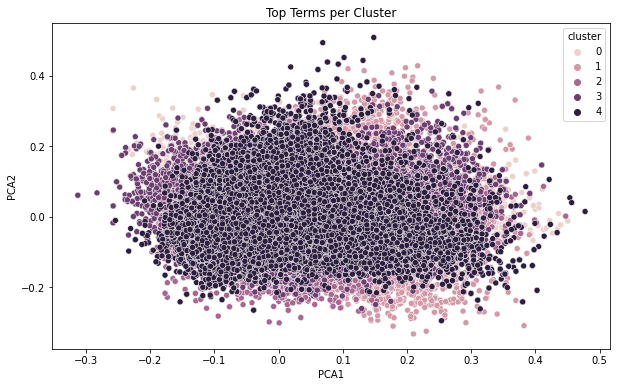

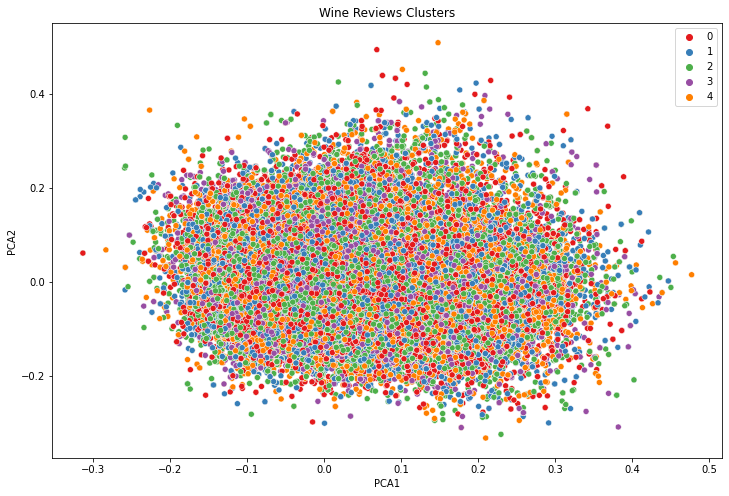

[1]


In [58]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# เลือกคอลัมน์ description
df = wine_data['description']

# แปลงข้อความเป็นตัวเลข
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,1))
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
X = count_vectorizer.fit_transform(df)
tfidf_matrix = tfidf_vectorizer.fit_transform(df)

# กำหนดจำนวนกลุ่มและทำการแบ่งด้วยKMeans
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

# Predict cluster labels for all wine reviews
cluster_labels = model.predict(X)

# Create a new dataframe with the wine review text and the predicted cluster label
df_clusters = pd.DataFrame({'text': df, 'cluster': cluster_labels})

# Visualize clusters with top terms using scatter plots
top_terms_per_cluster = pd.DataFrame()
for i in range(k):
    # Get wine reviews in cluster i
    cluster_i = df_clusters[df_clusters['cluster'] == i]['text']
    # Vectorize with TfidfVectorizer
    tfidf_vectorizer_i = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
    tfidf_matrix_i = tfidf_vectorizer_i.fit_transform(cluster_i)
    # Perform PCA
    pca = PCA(n_components=2)
    pca.fit(tfidf_matrix_i.toarray())
    pca_features = pca.transform(tfidf_matrix_i.toarray())
    # Create dataframe with top terms per cluster
    top_terms_i = pd.DataFrame({'PCA1': pca_features[:,0], 'PCA2': pca_features[:,1], 'cluster': i})
    top_terms_per_cluster = pd.concat([top_terms_per_cluster, top_terms_i])

# Visualize clusters with top terms using scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", data=top_terms_per_cluster, hue='cluster')
plt.title("Top Terms per Cluster")
plt.show()

# Plot all clusters in one plot with different colors
plt.figure(figsize=(12,8))
sns.scatterplot(x="PCA1", y="PCA2", hue=model.labels_, data=top_terms_per_cluster, palette='Set1')
plt.title('Wine Reviews Clusters')
plt.show()

# Test prediction using a sample text from the dataset
sample_text = "This wine has a good acidity and a long finish"
Y = count_vectorizer.transform([sample_text])
prediction = model.predict(Y)
print(prediction)